# Loading data into Pyleoclim objects

This notebook shows how we take our raw data, stored in `holo_chrons_study`, and convert it into [Pyleoclim](https://pyleoclim-util.readthedocs.io/en/latest/) objects. The `holo_chrons_study` object is a non-standard data object that contains age, d18O, d18O depth, chron, and chron depth data. These objects were produced by our BChron age modeling protocol. Here we load them into [pyleoclim.GeoSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#geoseries-pyleoclim-geoseries) and [pyleoclim.MultipleGeoSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multiplegeoseries-pyleoclim-multiplegeoseries) objects, and produce both the un-detrended and detrended versions of our data. These will serve as the main objects of analysis for the remainder of the study.

In [41]:
import pickle

import pyleoclim as pyleo

In [42]:
with open('../data/holo_chrons_study.pkl','rb') as handle:
    holo_chrons_study = pickle.load(handle)

with open('../data/pos_dict.pkl','rb') as handle:
    pos_dict = pickle.load(handle)


In [44]:
# Creating series and ensemble series objects

series_dict = {}
ens_dict = {}

for label,record in holo_chrons_study.items():
    #Load series
    time = record['age']
    value = record['d18O']
    lat = pos_dict[label]['lat']
    lon = pos_dict[label]['lon']
    
    if label == 'Oman':
        series = pyleo.GeoSeries(
            time = time,
            value=value,
            time_name = 'Age',
            time_unit = 'yrs BP',
            value_name = r'$\delta^{18} O$',
            value_unit = u'‰',
            label=label,
            lat = lat,
            lon=lon,
            archiveType='speleothem'
        ).slice((2500,10000))
        series.label = 'Oman'
    else:
        series = pyleo.GeoSeries(
            time = time,
            value=value,
            time_name = 'Age',
            time_unit = 'yrs BP',
            value_name = r'$\delta^{18} O$',
            value_unit = u'‰',
            label=label,
            lat = lat,
            lon=lon,
            archiveType='speleothem'
        )

    series_dict[label] = series

    #Load ensemble
    chron = record['chron']
    ens_list = []

    for time_axis in chron:
        if label == 'Oman':
            ens_series = pyleo.GeoSeries(
                time = time_axis,
                value=value,
                time_name = 'Age',
                time_unit = 'yrs BP',
                value_name = r'$\delta^{18} O$',
                value_unit = u'‰',
                label=label,
                lat = lat,
                lon=lon,
                archiveType='speleothem'
            ).slice((2500,10000))
        else:
            ens_series = pyleo.GeoSeries(
                time = time_axis,
                value=value,
                time_name = 'Age',
                time_unit = 'yrs BP',
                value_name = r'$\delta^{18} O$',
                value_unit = u'‰',
                label=label,
                lat = lat,
                lon=lon,
                archiveType='speleothem'
            )
        ens_list.append(ens_series)

    ens = pyleo.EnsembleSeries(ens_list)
    ens_dict[label] = ens


/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_55233/245671214.py:28: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  series = pyleo.GeoSeries(
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_55233/245671214.py:62: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  ens_series = pyleo.GeoSeries(


Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_55233/245671214.py:14: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  series = pyleo.GeoSeries(
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_55233/245671214.py:49: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  ens_series = pyleo.GeoSeries(


(<Figure size 1600x1200 with 15 Axes>,
 {0: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  1: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  2: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  3: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  4: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  5: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  6: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  7: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  8: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  9: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  10: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  11: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  12: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  13: <Axes: ylabel='$\\delta^{18} O$ [‰]'>,
  'x_axis': <Axes: xlabel='Age [yrs BP]'>})

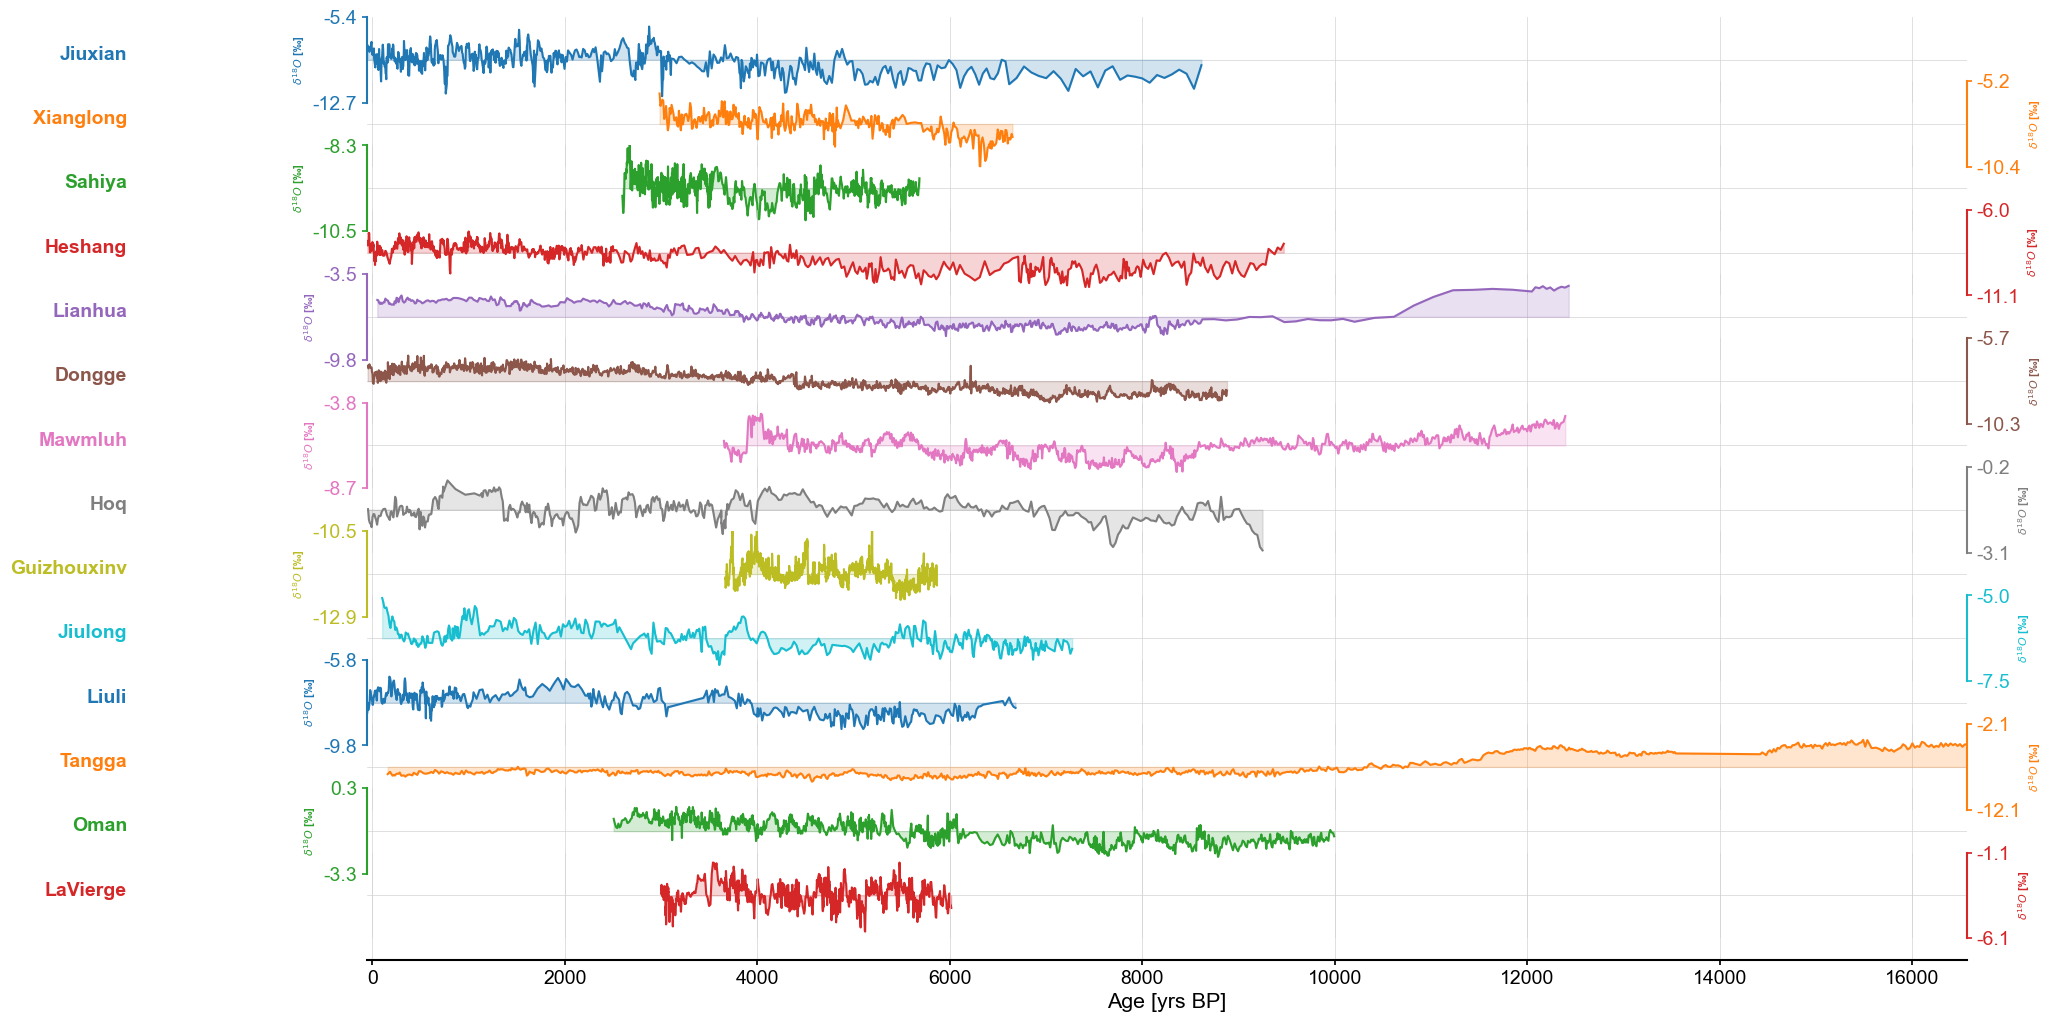

In [45]:
lerm_ms = pyleo.MultipleGeoSeries([series for series in series_dict.values()])
lerm_ms.stackplot(figsize=(16,12))

(<Figure size 1800x600 with 2 Axes>,
 {'map': <GeoAxes: xlabel='lon', ylabel='lat'>, 'leg': <Axes: >})

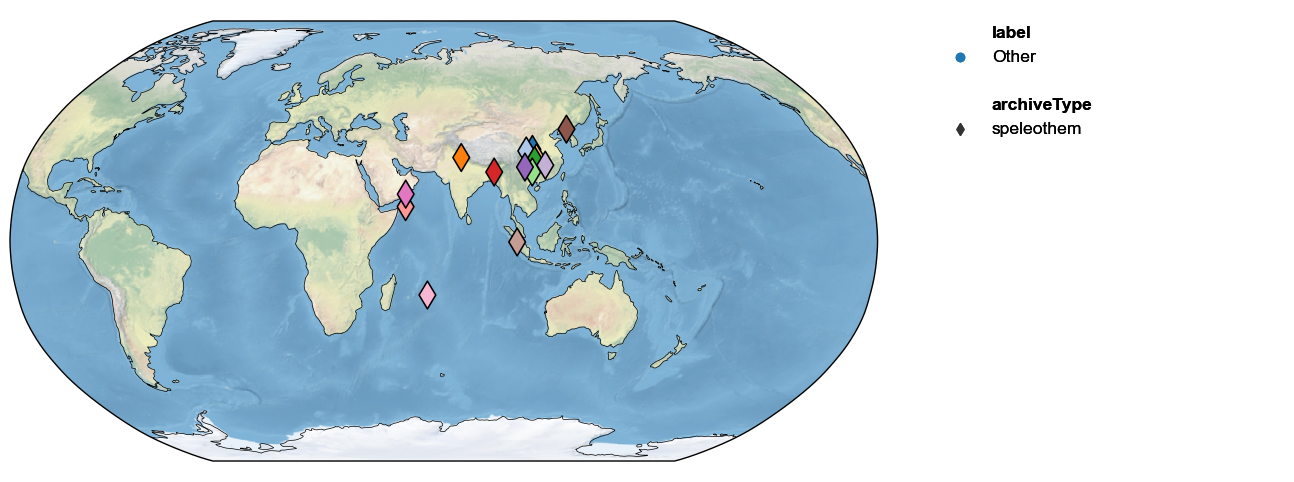

In [46]:
lerm_ms.map(hue='label')

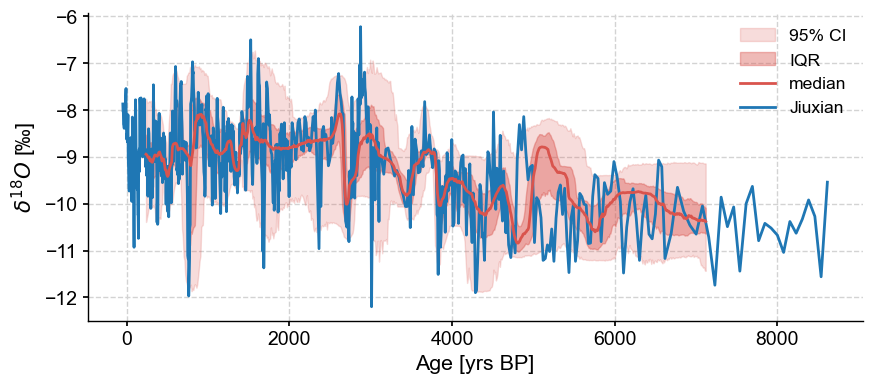

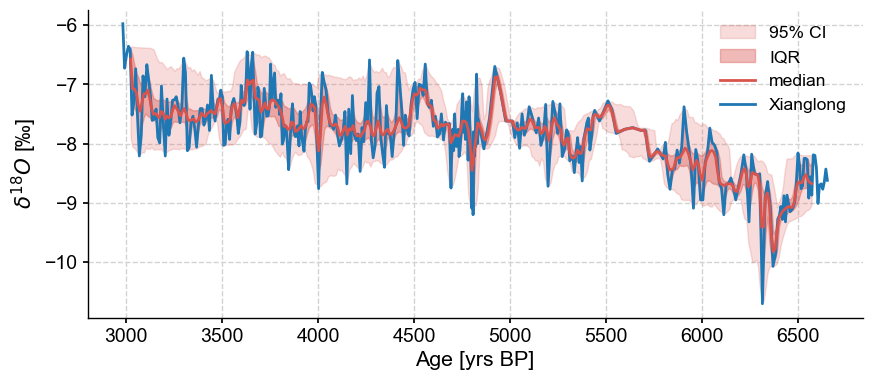

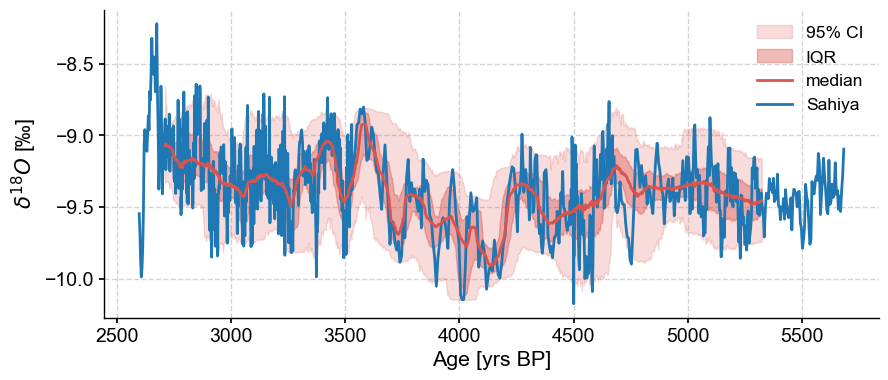

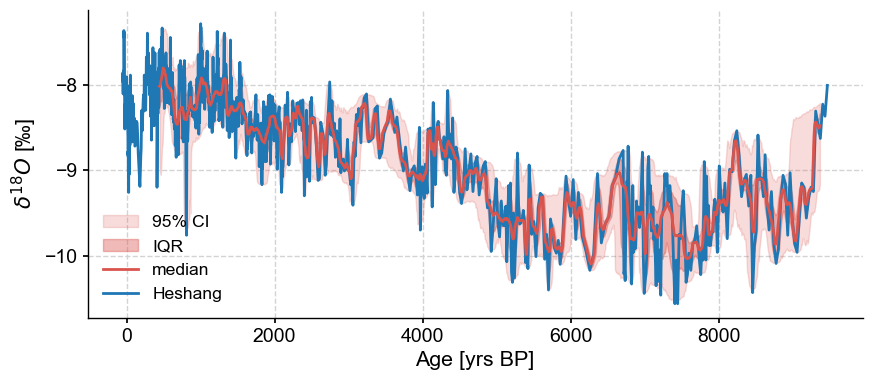

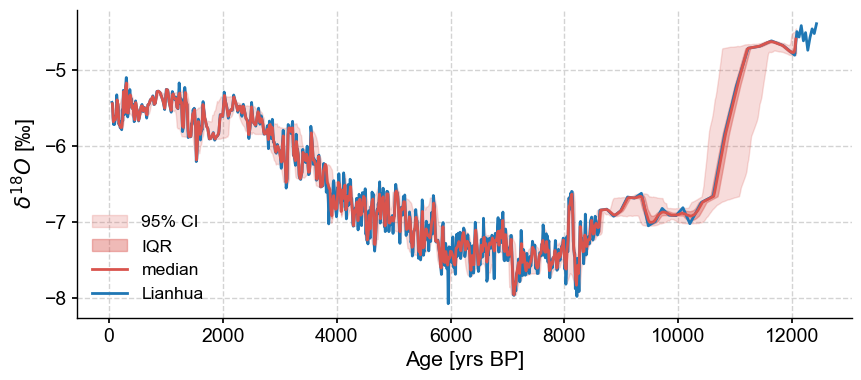

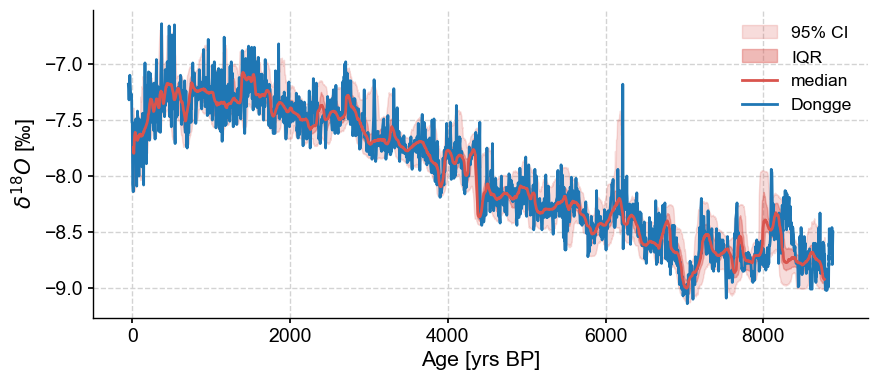

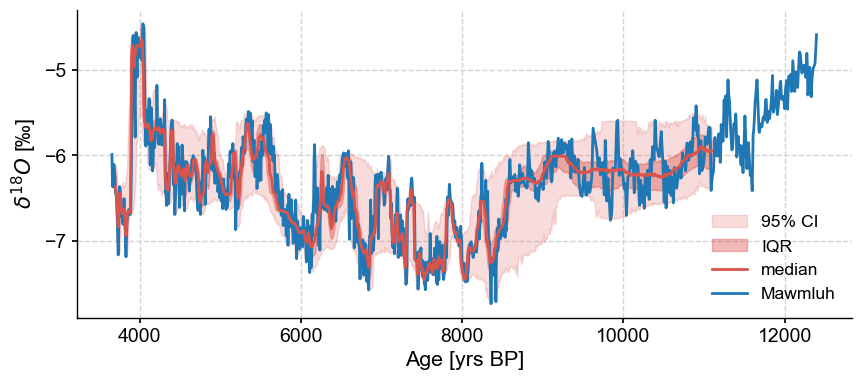

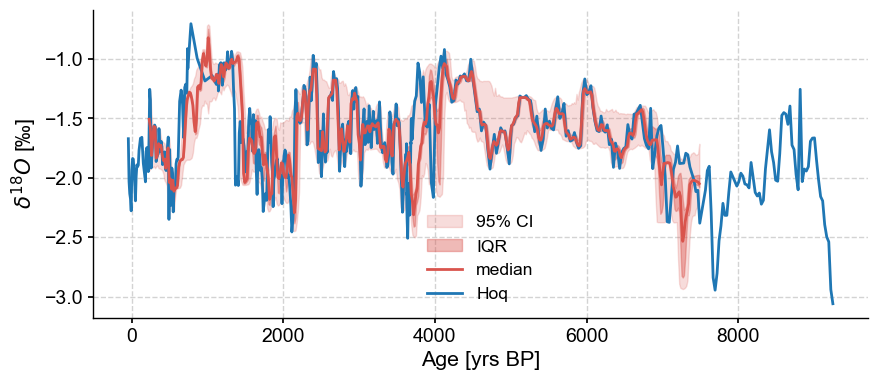

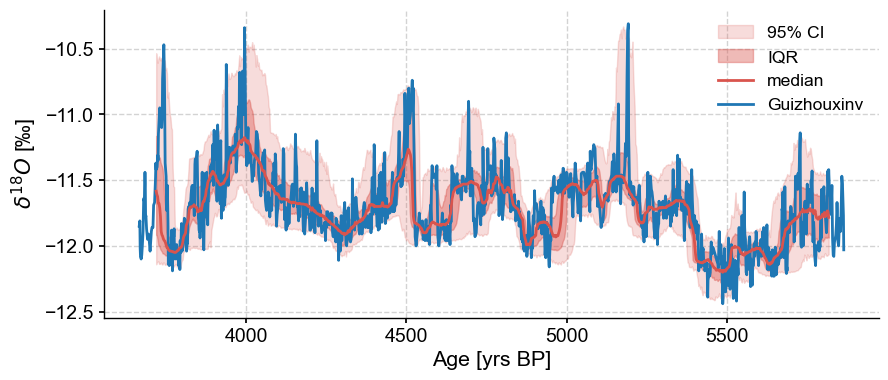

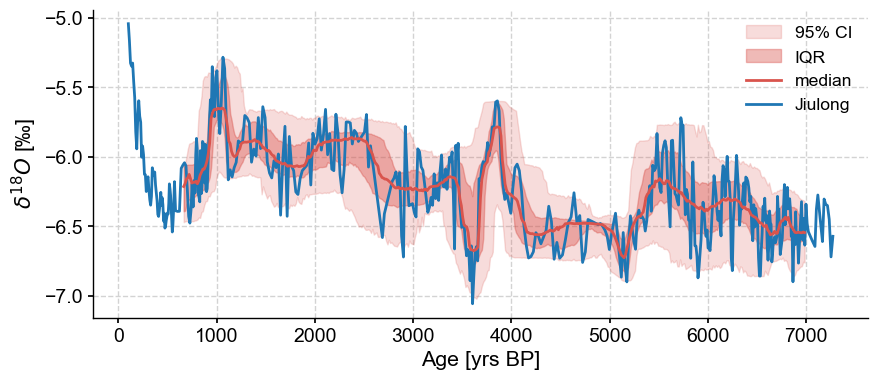

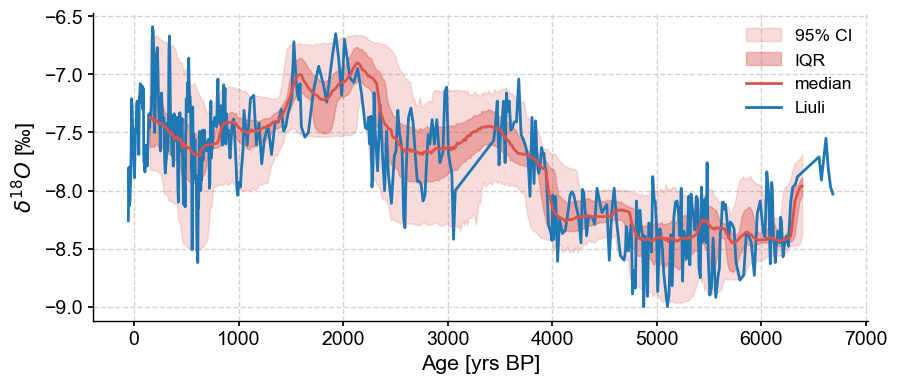

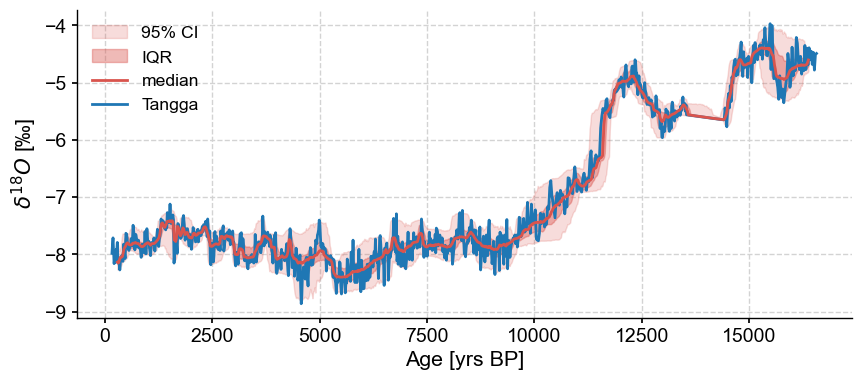

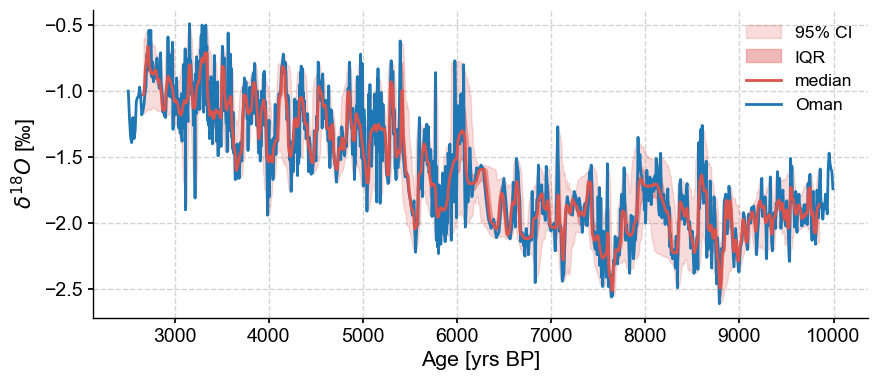

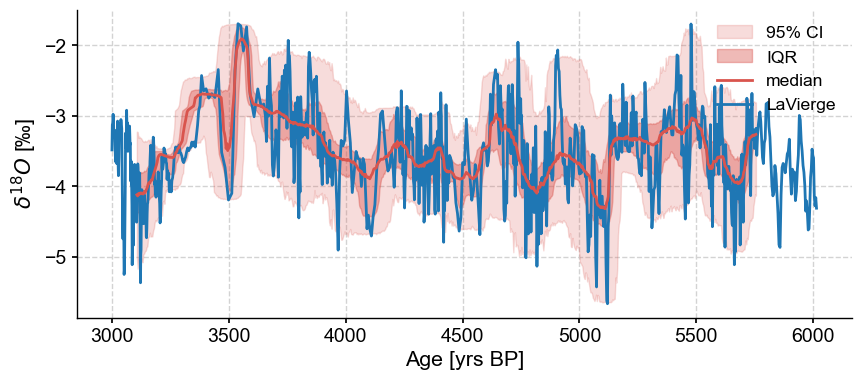

In [47]:
for label,series in series_dict.items():
    ens = ens_dict[label]
    fig,ax = ens.common_time().plot_envelope()
    series.plot(ax=ax)


In [48]:
with open('../data/series_dict.pkl','wb') as handle:
    pickle.dump(series_dict,handle)

with open('../data/ens_dict.pkl','wb') as handle:
    pickle.dump(ens_dict,handle)

Apply some preprocessing

In [49]:
holocene_bounds = (0,10000)
preprocessed_series_dict = {}

for label,series in series_dict.items():
    preprocessed_series = series.slice(holocene_bounds).interp().detrend(method='savitzky-golay');
    preprocessed_series_dict[label] = preprocessed_series

preprocessed_ens_dict = {}

for label,ens in ens_dict.items():
    preprocessed_ens_list = []
    for series in ens.series_list:
        preprocessed_series = series.slice(holocene_bounds).interp().detrend(method='savitzky-golay');
        preprocessed_ens_list.append(preprocessed_series)
    preprocessed_ens_dict[label] = pyleo.EnsembleSeries(preprocessed_ens_list)

/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/pyleoclim/utils/tsutils.py:1417: UserWarning: Timeseries is not evenly-spaced, interpolating...
  warnings.warn("Timeseries is not evenly-spaced, interpolating...")


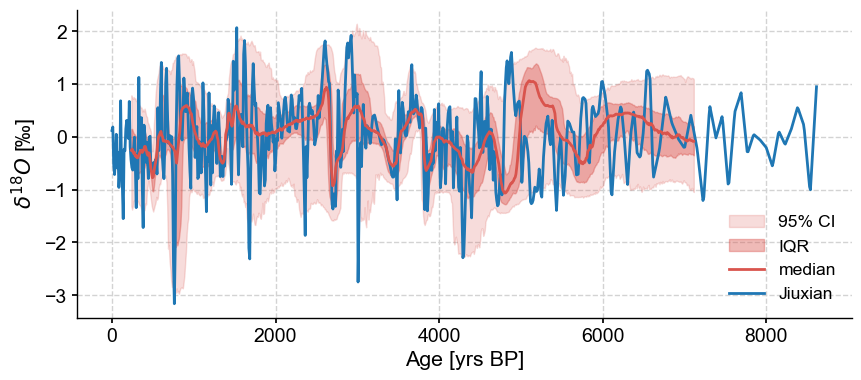

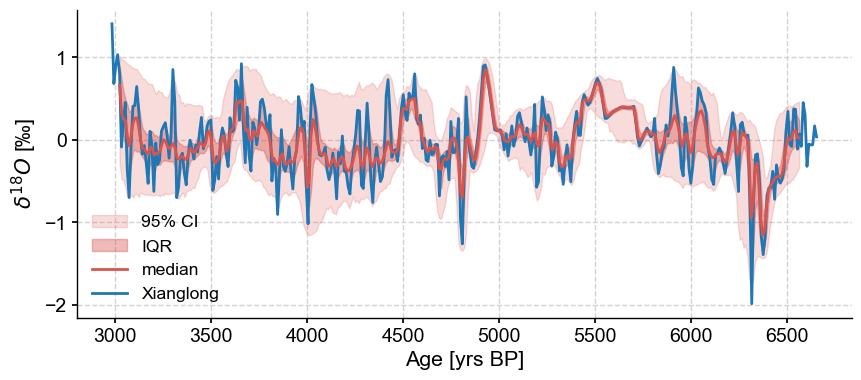

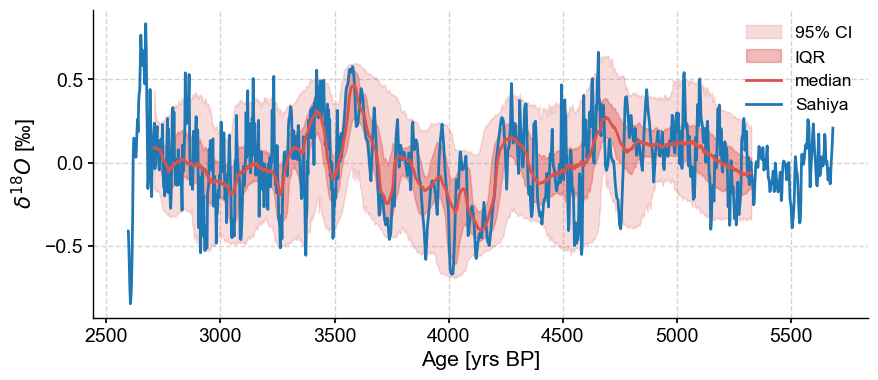

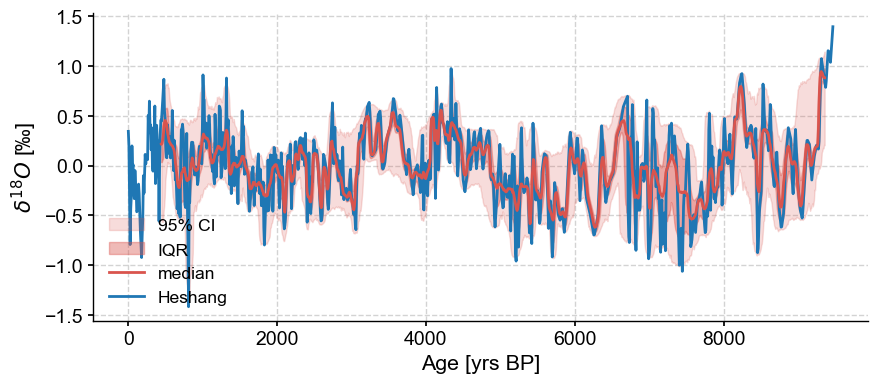

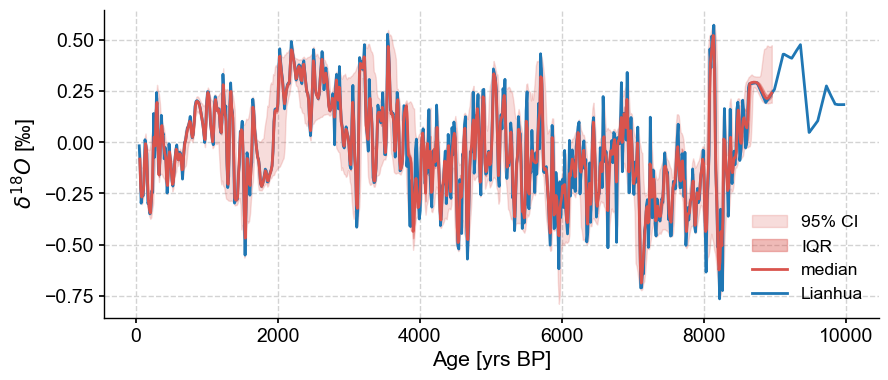

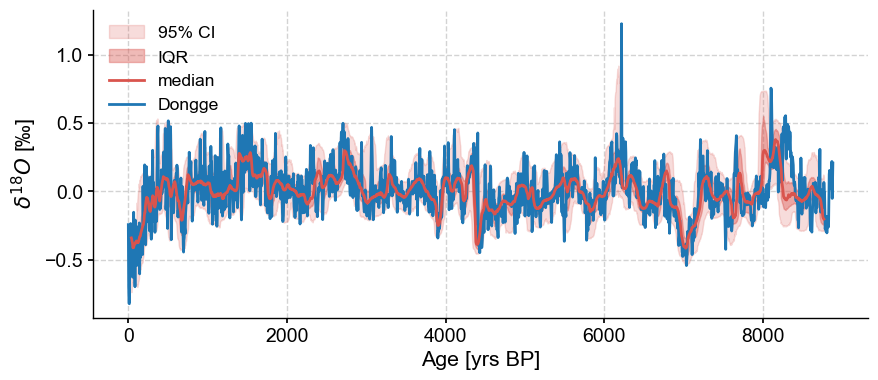

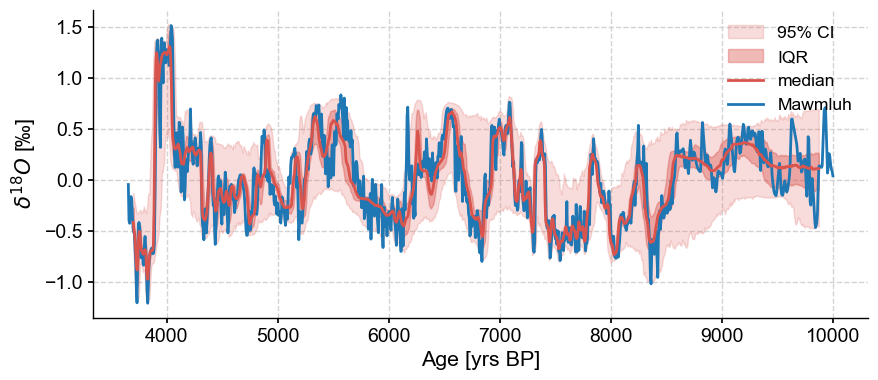

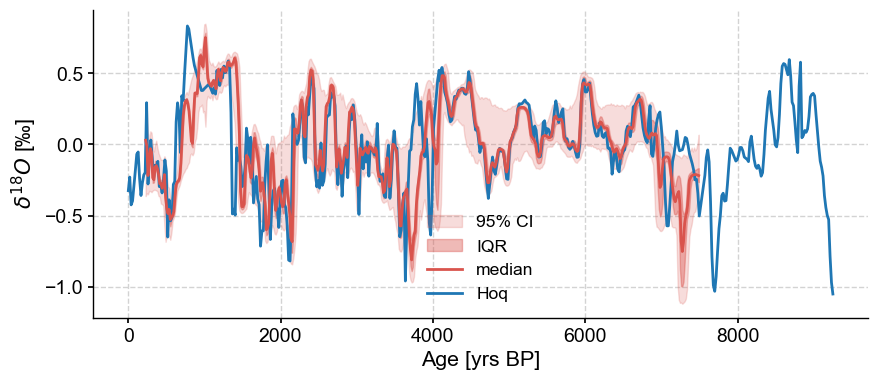

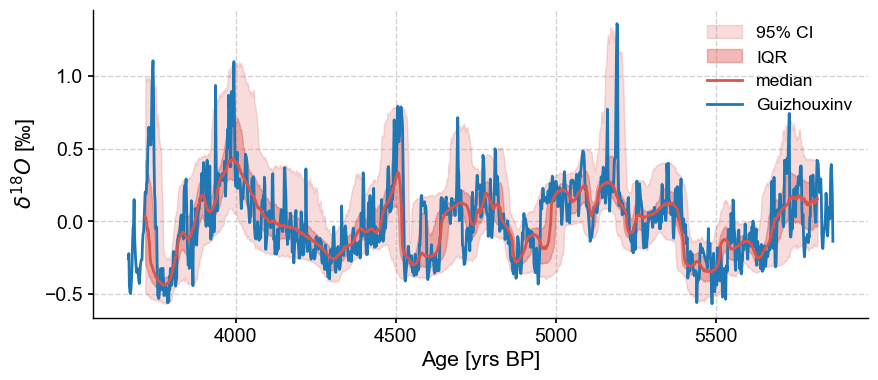

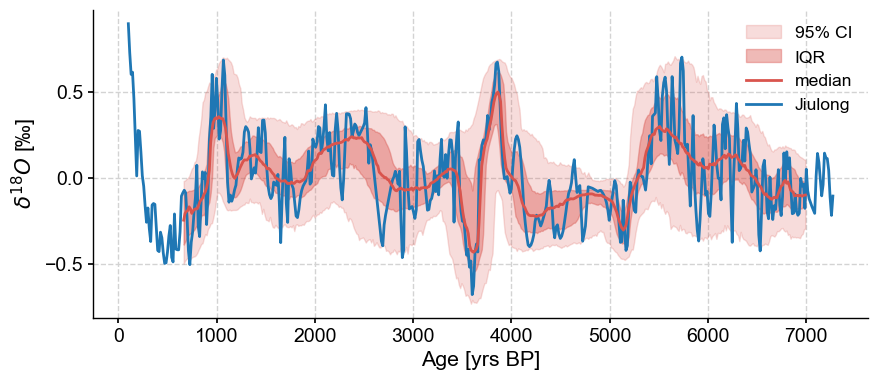

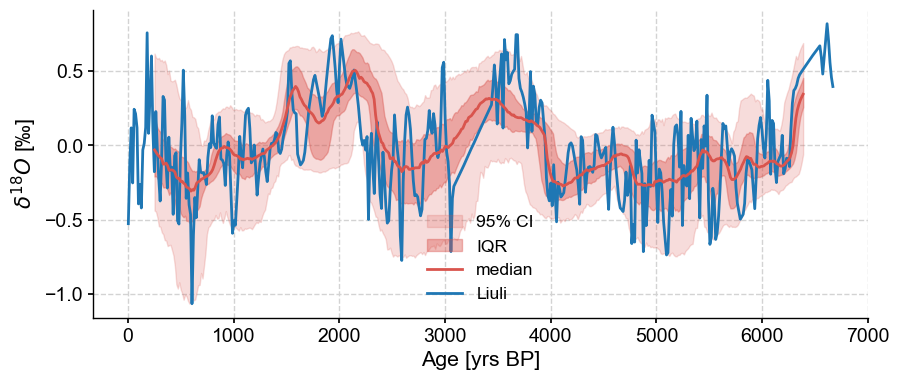

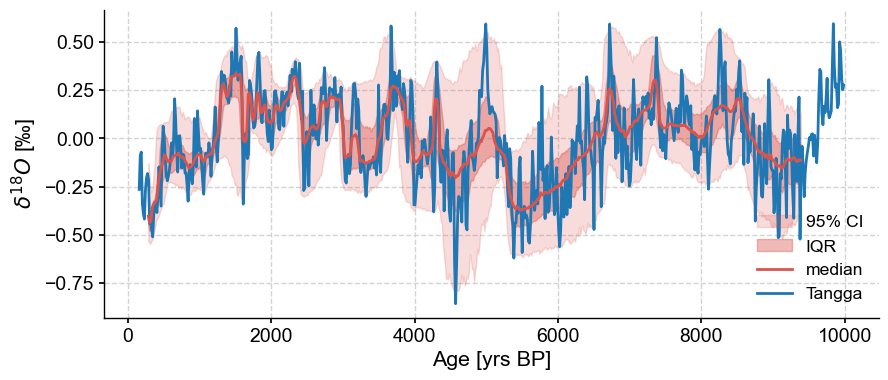

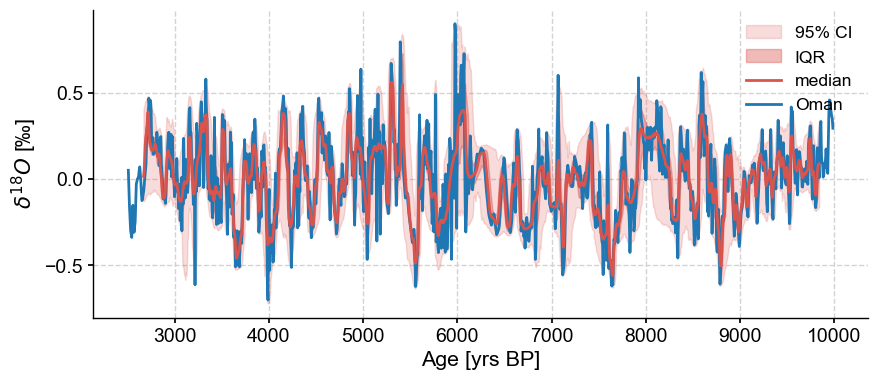

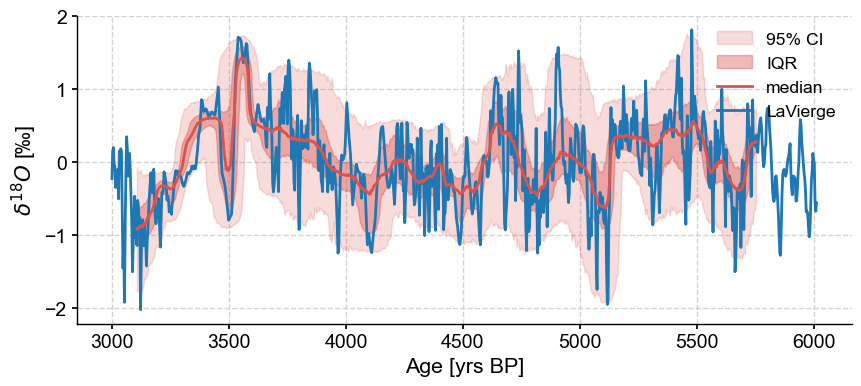

In [50]:
for label,series in preprocessed_series_dict.items():
    ens = preprocessed_ens_dict[label]
    fig,ax = ens.common_time().plot_envelope()
    series.plot(ax=ax)

In [51]:
with open('../data/preprocessed_series_dict.pkl','wb') as handle:
    pickle.dump(preprocessed_series_dict,handle)

with open('../data/preprocessed_ens_dict.pkl','wb') as handle:
    pickle.dump(preprocessed_ens_dict,handle)